In [2]:
__author__ = "Himanshu Dutta"

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("u_c_hihi.csv")
ETMat = data.to_numpy().reshape(1024,32)

In [5]:
ETMat.shape

(1024, 32)

In [37]:
def min_min_scheduler(ETMat,readyTime = 0):
    #Runs with a default ready time of 0, for all the machine in the initial state
    if readyTime == 0: 
        readyTime = np.zeros(ETMat.shape[1])
    #Output format: {Task ID, Machine ID, Execution Time}
    out = np.empty((ETMat.shape[0],3))
    #Completion Time = ExecutionTime + ReadyTime
    CTMat = ETMat + readyTime
    CTMat = np.hstack((CTMat, np.arange(CTMat.shape[0]).reshape(CTMat.shape[0],-1)))
    for i in range(ETMat.shape[0]):
        TId = np.where(CTMat == CTMat[:,:-1].min())[0][0]
        MId = np.where(CTMat == CTMat[:,:-1].min())[1][0]
        TId_ET = int(CTMat[TId,-1])
        print("TId : %d MId : %d Time: %f" %(TId,MId, ETMat[TId_ET,MId]))
        #Updating the Ready Time for the current machine
        readyTime[MId] = readyTime[MId] + ETMat[TId_ET,MId]
        #Output the Task-Machine array to an output array
        #Format: {Task ID, Machine ID, Execution Time}
        out[i,0] = CTMat[TId,-1]; out[i,1] = MId; out[i,2] = ETMat[TId_ET,MId]
        #Updating the value with current ready time for the given machine in the Completion Time Matrix
        CTMat[:,MId] = CTMat[:,MId] + ETMat[TId_ET,MId]
        #Removal of the mapped task from the CTMatrix
        CTMat = np.delete(CTMat,TId, 0)
    print("Final Ready Time \n", readyTime)
    return (out, readyTime)


out,readyTime = min_min_scheduler(ETMat)

TId : 626 MId : 0 Time: 2.200000
TId : 726 MId : 0 Time: 13.420000
TId : 163 MId : 0 Time: 67.830000
TId : 332 MId : 0 Time: 108.540000
TId : 10 MId : 0 Time: 119.070000
TId : 828 MId : 0 Time: 208.460000
TId : 390 MId : 0 Time: 267.960000
TId : 94 MId : 0 Time: 324.850000
TId : 547 MId : 0 Time: 336.040000
TId : 578 MId : 1 Time: 1522.880000
TId : 186 MId : 0 Time: 350.260000
TId : 586 MId : 0 Time: 439.770000
TId : 655 MId : 2 Time: 2247.030000
TId : 892 MId : 0 Time: 495.360000
TId : 717 MId : 0 Time: 538.410000
TId : 434 MId : 1 Time: 2063.760000
TId : 836 MId : 0 Time: 559.090000
TId : 846 MId : 0 Time: 665.870000
TId : 128 MId : 0 Time: 1131.490000
TId : 829 MId : 3 Time: 6086.880000
TId : 754 MId : 1 Time: 2758.140000
TId : 868 MId : 0 Time: 1309.690000
TId : 851 MId : 0 Time: 1410.150000
TId : 362 MId : 2 Time: 6194.860000
TId : 420 MId : 0 Time: 1529.970000
TId : 675 MId : 4 Time: 10577.760000
TId : 988 MId : 1 Time: 4308.760000
TId : 427 MId : 0 Time: 1686.100000
TId : 841 MI

TId : 33 MId : 0 Time: 56124.950000
TId : 47 MId : 0 Time: 56289.150000
TId : 335 MId : 7 Time: 624928.120000
TId : 397 MId : 1 Time: 135723.690000
TId : 80 MId : 0 Time: 56982.660000
TId : 15 MId : 13 Time: 1192422.000000
TId : 306 MId : 0 Time: 57087.150000
TId : 142 MId : 2 Time: 213732.330000
TId : 252 MId : 3 Time: 295600.880000
TId : 394 MId : 0 Time: 57613.520000
TId : 55 MId : 5 Time: 469386.590000
TId : 129 MId : 1 Time: 137400.840000
TId : 102 MId : 6 Time: 578408.000000
TId : 108 MId : 17 Time: 1521269.250000
TId : 370 MId : 4 Time: 425274.500000
TId : 29 MId : 0 Time: 59282.070000
TId : 335 MId : 0 Time: 59611.160000
TId : 242 MId : 1 Time: 140969.500000
TId : 58 MId : 2 Time: 222970.980000
TId : 17 MId : 0 Time: 61455.770000
TId : 409 MId : 25 Time: 2632653.500000
TId : 23 MId : 0 Time: 62366.190000
TId : 376 MId : 15 Time: 1507569.120000
TId : 92 MId : 3 Time: 296266.530000
TId : 250 MId : 1 Time: 144112.000000
TId : 218 MId : 0 Time: 68257.450000
TId : 76 MId : 8 Time: 7

In [55]:
print("Ready Time with Min-Min Algorithm:", readyTime.max())

Ready Time with Min-Min Algorithm: 22508062.400000002


In [63]:
out.view('i8,i8,i8').sort(order=['f0'], axis=0)
out

array([[0.00000000e+00, 4.00000000e+00, 2.56879380e+05],
       [1.00000000e+00, 2.60000000e+01, 4.29153550e+06],
       [2.00000000e+00, 1.00000000e+00, 2.72716440e+05],
       ...,
       [1.02100000e+03, 1.50000000e+01, 4.36251280e+05],
       [1.02200000e+03, 1.00000000e+01, 1.26321662e+06],
       [1.02300000e+03, 3.00000000e+00, 3.61647970e+05]])

In [64]:

a = initialize_population(100,1024,32)
a[0,:] = out[:,1].reshape(1,-1)

In [65]:
fit = calc_fitness(a,ETMat)
selection(population,fit,0.2)

Before: 
 [[4.00000000e+00 2.60000000e+01 1.00000000e+00 ... 1.00000000e+01
  3.00000000e+00 2.25080624e+07]
 [2.50000000e+01 2.60000000e+01 1.00000000e+00 ... 1.00000000e+01
  1.00000000e+01 1.44602291e+08]
 [1.50000000e+01 5.00000000e+00 2.00000000e+01 ... 2.10000000e+01
  3.00000000e+00 1.49232695e+08]
 ...
 [4.00000000e+00 2.60000000e+01 1.00000000e+00 ... 2.70000000e+01
  3.00000000e+00 2.31559515e+08]
 [0.00000000e+00 2.60000000e+01 1.00000000e+00 ... 1.00000000e+01
  3.00000000e+00 2.43924026e+08]
 [4.00000000e+00 2.60000000e+01 2.60000000e+01 ... 1.00000000e+01
  3.00000000e+00 2.70893861e+08]]
Parents: 
[[4.00000000e+00 2.60000000e+01 1.00000000e+00 ... 1.00000000e+01
  3.00000000e+00 2.25080624e+07]
 [2.50000000e+01 2.60000000e+01 1.00000000e+00 ... 1.00000000e+01
  1.00000000e+01 1.44602291e+08]
 [1.50000000e+01 5.00000000e+00 2.00000000e+01 ... 2.10000000e+01
  3.00000000e+00 1.49232695e+08]
 ...
 [1.20000000e+01 1.00000000e+01 1.00000000e+00 ... 3.00000000e+01
  3.00000000

array([[ 4., 26.,  1., ..., 15., 10.,  3.],
       [25., 26.,  1., ..., 15., 10., 10.],
       [15.,  5., 20., ..., 13., 21.,  3.],
       ...,
       [12., 10.,  1., ..., 15., 30.,  3.],
       [25., 26.,  1., ..., 15., 10.,  3.],
       [ 8., 23., 11., ..., 15., 10., 28.]])

Phases:
    1. Initial Population
    2. Fitness Function
    3. Selection
    4. Crossover
    5. Mutation

In [75]:
def initialize_population(size,tasks,machines):
    #Size: Number of Chromosomes in the population
    #Tasks: Number of tasks in the MetaTask Matrix
    #Machines: Total Number of virtual resources.
    return np.random.choice(machines,(size,tasks))


def calc_fitness(population,ETMat):
    #Calculation of fitness based on total readyTime of all the solutions/chromosomes in the population.
    #Ready Time of all the solutions are calculated, and the chromosomes with lesser readyTime are better.
    machines = len(np.unique(population))
    readyTime = np.zeros((population.shape[0],machines))
    for i in range(population.shape[0]):
        for j in range(population.shape[1]):
            readyTime[i,population[i,j]] += ETMat[j,population[i,j]]
        readyTime[i] = readyTime[i].max()
    fitness = readyTime[:,0]
    return fitness
    
def selection(population,fitness,survivalRate):
    #Selection of the parents to crossover.
    #Selection is done on the basis of fitness value calculated over the current population
    parent = np.hstack((population,fitness.reshape(population.shape[0],-1)))
    parent = parent[parent[:,-1].argsort()]
    cutoff = int(survivalRate*population.shape[0])
    return parent[:cutoff,:-1]

def crossover(parents,offspring_size):
    #Crossing is done in a single-point manner, so as to breed the best of the current generation
    offspring_size = (int(parents.shape[0]/(1-offspring_size))-parents.shape[0],parents.shape[1])
    print("Offspring_Size: ")
    print(offspring_size)
    children = np.empty(offspring_size)
    crossover_point = int(offspring_size[1]/2)
    
    for i in range(offspring_size[0]):
        parent1 = i%parents.shape[0]
        parent2 = (i+1)%parents.shape[0]
        
        children[i,:crossover_point] = parents[parent1,:crossover_point]
        children[i,crossover_point:] = parents[parent2,crossover_point:]
    return children

def mutation(children,mutation_ratio):
    machines = len(np.unique(children))
    mutation_size = int(mutation_ratio * children.shape[1])
    
    for child in range(children.shape[0]):
        genes = np.random.choice(children.shape[1],mutation_size)
        for gene_pos in genes: children[child,gene_pos] = np.random.choice(machines)
    return children

### The algorithm works on the principle of makespan minimization. For the same, at each generation,The individuals/chromosomes which give the minimum makespan survive, so as to breed further to transfer their best genes onto the next generation. 


In [76]:
#Parameters
pop_size = 100
tasks = 1024
machines = 32
survivalRate = 0.5
mutationRatio = 0.01
total_generations = 500
    

In [77]:

population = initialize_population(pop_size,tasks,machines)

#Adding Output of min-min algorith as one of the parents
population[0,:] = out[:,1].reshape(1,-1)


In [80]:
print("Initial Population: ", population)
overall_fitness = []
best_results = []


for generation in range(total_generations):
    print("*****************************************************")
    print("Generation: ", generation)
    #Calculation of fitness of each generation
    fitness = calc_fitness(population,ETMat)
    print("Fitness: \n", fitness)
    
    #Adding the best result of each generation to a list
    best_results.append(fitness.min())
    
    #Selection of Parents to crossover
    parents = selection(population,fitness,survivalRate)
    print("Parents: \n", parents)
    
    #Crossing-over to get children
    children = crossover(parents,1-survivalRate)
    
    #Adding variations/mutations to the current children
    children = mutation(children,mutationRatio)
    
    #Updating the population with the parent and children
    population[:parents.shape[0],:] = parents
    population[parents.shape[0]:,:] = children
    print("*****************************************************")
    
#After all the generations,

Initial Population:  [[ 4 26  1 ... 15 10  3]
 [ 7 18 21 ...  6 19 21]
 [ 7 14 31 ... 13 29  7]
 ...
 [ 5 17 20 ...  1  1 30]
 [24 16 20 ... 27 18 12]
 [ 4 29 16 ... 18  9  2]]
*****************************************************
Generation:  0
Fitness: 
 [2.25080624e+07 1.71508335e+08 2.50868980e+08 2.04458487e+08
 2.07233620e+08 1.88386236e+08 2.27987331e+08 1.68985264e+08
 1.92104822e+08 1.66352777e+08 2.08734578e+08 2.11095844e+08
 1.80347162e+08 1.82282117e+08 1.73434086e+08 2.02836322e+08
 2.00088629e+08 1.68244947e+08 1.76010523e+08 1.51539751e+08
 1.83135551e+08 1.85059434e+08 1.62060085e+08 2.11666055e+08
 2.31546906e+08 1.74569767e+08 1.50469636e+08 1.91296390e+08
 2.38598959e+08 1.78972797e+08 1.91592069e+08 1.77906505e+08
 2.06927841e+08 1.68171087e+08 1.91849651e+08 1.79799568e+08
 1.67170649e+08 1.90211916e+08 1.93225670e+08 1.83673041e+08
 1.62689412e+08 1.90614765e+08 1.63676706e+08 1.82259108e+08
 2.10621628e+08 1.92849485e+08 1.86925837e+08 2.11640024e+08
 2.04437374

Fitness: 
 [2.25080624e+07 2.56972219e+07 2.58461014e+07 2.87162430e+07
 2.87362709e+07 2.87362709e+07 3.07454971e+07 3.21323344e+07
 3.42201334e+07 1.03403105e+08 1.03806378e+08 1.03806378e+08
 1.03806378e+08 1.04920609e+08 1.10866269e+08 1.10866269e+08
 1.10976630e+08 1.11808684e+08 1.13171776e+08 1.14135482e+08
 1.18915160e+08 1.23124276e+08 1.25208404e+08 1.37935817e+08
 1.38115796e+08 1.39840268e+08 1.39851611e+08 1.39851611e+08
 1.40002796e+08 1.40239503e+08 1.40785183e+08 1.40797683e+08
 1.40982274e+08 1.41694844e+08 1.41955648e+08 1.41955648e+08
 1.41955648e+08 1.43038286e+08 1.43235499e+08 1.44015219e+08
 1.44092224e+08 1.44367949e+08 1.44931422e+08 1.45729463e+08
 1.46279887e+08 1.46332332e+08 1.46377652e+08 1.46829222e+08
 1.46874236e+08 1.48253451e+08 2.76057204e+07 2.54581383e+07
 3.32616164e+07 2.87162430e+07 3.19883191e+07 2.95613831e+07
 3.25004079e+07 3.41178199e+07 3.42201334e+07 1.72079598e+08
 1.11071747e+08 1.03806378e+08 1.02390362e+08 1.10866269e+08
 1.10866269e+

Fitness: 
 [22508062.4        24992059.98       25458138.35       25697221.91
 25733089.5        25846101.37       26854726.41       27042785.43
 27426066.5        27504614.03       27605720.44       27605720.44
 27811429.2        27886398.93       28005636.78       28016183.43
 28181148.06       28196212.62       28196212.62       28220320.65
 28262448.95       28390659.95       28456041.4        28483878.86
 28501804.43       28528114.56       28528114.56       28683165.93
 28716243.         28716243.         28716243.         28716243.
 28716243.         28736270.94       28736270.94       28736270.94
 28736270.94       28736270.94       28736270.94       28736270.94
 28736270.94       28847902.2        28883529.48       28884110.18
 28954102.         28957019.33       29319986.25       29324155.25
 29463319.35       29544652.74       31839144.16       28647053.94
 26854726.41       28196212.62       27725993.1        27436796.11
 33250067.87       26615192.37       31269410.87     

Fitness: 
 [22508062.4        24992059.98       25170398.74       25315056.
 25458138.35       25458138.35       25685963.75       25697221.91
 25733089.5        25846101.37       25986923.12       26045867.36
 26478893.94       26615192.37       26615192.37       26854726.41
 26854726.41       26909546.75999999 27007265.99       27042785.43
 27042785.43       27106469.31       27106469.31       27253806.44
 27296566.91       27307373.54       27373964.43       27396440.99
 27426066.5        27436796.11       27504614.03       27605720.44
 27605720.44       27605720.44       27669640.79       27725993.1
 27734770.15       27811429.2        27813161.31       27886398.93
 28005636.78       28016183.43       28040880.25       28063561.53
 28124560.05       28181148.06       28196212.62       28196212.62
 28196212.62       28196212.62       35977835.93       29374417.24
 28618810.43       29843937.85       26556663.36       27531400.29
 29410177.25       28196212.62       27947256.1       

Fitness: 
 [22508062.4        24471878.93       24757838.65       24975260.62
 24975260.62       24992059.98       25115911.28       25127041.49
 25142108.19       25169308.47999999 25170398.74       25315056.
 25369615.93       25458138.35       25458138.35       25559559.5
 25601554.         25677674.         25685963.75       25697221.91
 25733089.5        25739862.07       25846101.37       25846101.37
 25846101.37       25856530.28       25884995.74       25959456.79
 25986923.12       26045867.36       26075127.59       26089694.25
 26106981.         26136808.08       26143470.17       26192787.03
 26195948.         26200615.29       26323873.62       26478893.94
 26478893.94       26556663.36       26562831.67       26615192.37
 26615192.37       26615192.37       26615192.37       26615192.37
 26615192.37       26615192.37       23862217.06       38420551.
 28698890.44       26593763.06       26994638.97       28521593.5
 24723359.99       27042185.9        30161465.28       28

Fitness: 
 [22508062.4        23670018.9        23862217.06       24105428.91
 24336549.94       24440198.91       24471878.93       24605529.5
 24723359.99       24723359.99       24757838.65       24874038.
 24975260.62       24975260.62       24975260.62       24992059.98
 25097556.3        25115911.28       25127041.49       25142108.19
 25169308.47999999 25169308.47999999 25170398.74       25249679.74
 25312365.59       25315056.         25369615.93       25432962.25
 25458138.35       25458138.35       25458138.35       25458138.35
 25492038.28       25559559.5        25601554.         25601554.
 25677674.         25685963.75       25697221.91       25733089.5
 25739862.07       25772405.31       25846101.37       25846101.37
 25846101.37       25847439.28       25856530.28       25856530.28
 25884995.74       25885612.78       25663480.34       29631350.25
 25335219.06       27698609.53       26715416.03       26801262.19
 24775550.62       25563410.59       29955746.93       24

Fitness: 
 [22508062.4        23100392.36       23670018.9        23862217.06
 24086299.         24105428.91       24336549.94       24425233.45
 24440198.91       24471878.93       24582248.         24605529.5
 24634324.83       24690110.41       24723359.99       24723359.99
 24723359.99       24757838.65       24757838.65       24775550.62
 24874038.         24910815.12       24922343.7        24929753.05999999
 24946492.25       24975260.62       24975260.62       24975260.62
 24992059.98       24994593.55       25087006.62       25097556.3
 25103407.72       25115911.28       25127041.49       25142108.19
 25169308.47999999 25169308.47999999 25170398.74       25211094.03
 25213255.56       25213434.5        25249679.74       25312365.59
 25313362.41       25315056.         25335219.06       25369016.74
 25369615.93       25385761.43       25247816.28       26665621.41
 26744388.5        26719275.12       27914352.54       27749659.5
 28740205.75       31311338.28       26722645.76

Parents: 
 [[ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 ...
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]]
Offspring_Size: 
(50, 1024)
*****************************************************
*****************************************************
Generation:  37
Fitness: 
 [22508062.4        23021524.19       23100392.36       23670018.9
 23862217.06       23894153.12       24086299.         24105428.91
 24336549.94       24425233.45       24440198.91       24471878.93
 24471878.93       24471878.93       24582248.         24605529.5
 24614657.49       24634324.83       24634886.89       24673806.93
 24690110.41       24723359.99       24723359.99       24723359.99
 24723359.99       24723359.99       24757838.65       24757838.65
 24775550.62       24783729.49       24812719.93       24814890.28
 24874038.         24874038.         24910815.12       24922343.7
 24922343.7        24929753.059999

Fitness: 
 [22508062.4        23021524.19       23100392.36       23670018.9
 23862217.06       23862217.06       23894153.12       23969078.62
 24086299.         24105428.91       24336549.94       24425233.45
 24440198.91       24471878.93       24471878.93       24471878.93
 24582248.         24605529.5        24614657.49       24634324.83
 24634886.89       24673806.93       24690110.41       24723359.99
 24723359.99       24723359.99       24723359.99       24723359.99
 24723359.99       24723359.99       24739871.78       24757838.65
 24757838.65       24775550.62       24783729.49       24789994.94
 24812719.93       24814890.28       24874038.         24874038.
 24874038.         24874038.         24874038.         24910815.12
 24922343.7        24922343.7        24922343.7        24923737.03
 24929753.05999999 24946492.25       26502256.74       31924961.75
 26802962.62       29190913.62       29927120.         24518529.49
 25954367.2        27480210.28       30117305.5       

Fitness: 
 [22508062.4        23021524.19       23100392.36       23487833.1
 23670018.9        23834251.78       23862217.06       23862217.06
 23894153.12       23969078.62       24086299.         24086299.
 24086299.         24086299.         24105428.91       24336549.94
 24425233.45       24440198.91       24471878.93       24471878.93
 24471878.93       24518529.49       24582248.         24600991.72
 24605529.5        24614657.49       24634324.83       24634886.89
 24653175.07       24662413.87       24673806.93       24690110.41
 24723359.99       24723359.99       24723359.99       24723359.99
 24723359.99       24723359.99       24723359.99       24723359.99
 24723359.99       24739871.78       24757838.65       24757838.65
 24775550.62       24783729.49       24789994.94       24812719.93
 24814890.28       24830334.18       28697606.42       34100500.94
 27838189.43       25587132.85       28885214.5        27363720.61
 27916318.19       29331753.69       27439801.94      

Fitness: 
 [22508062.4        23021524.19       23100392.36       23487833.1
 23670018.9        23683787.18       23834251.78       23862217.06
 23862217.06       23894153.12       23969078.62       24086299.
 24086299.         24086299.         24086299.         24086299.
 24105428.91       24336549.94       24347146.86       24425233.45
 24425233.45       24431445.43       24440198.91       24471878.93
 24471878.93       24471878.93       24478978.41       24497236.63
 24518529.49       24582248.         24600991.72       24605529.5
 24614076.5        24614657.49       24634324.83       24634324.83
 24634886.89       24653175.07       24662413.87       24662413.87
 24673806.93       24690110.41       24723359.99       24723359.99
 24723359.99       24723359.99       24723359.99       24723359.99
 24723359.99       24723359.99       25521985.44       28990769.55
 26429795.43       29534614.         38948870.94000001 32357745.93
 27481880.69       28258528.13       30323082.62       28

Fitness: 
 [22508062.4  23021524.19 23100392.36 23487833.1  23585593.36 23670018.9
 23683787.18 23834251.78 23862217.06 23862217.06 23894153.12 23969078.62
 24066495.88 24086299.   24086299.   24086299.   24086299.   24086299.
 24086299.   24105428.91 24259660.91 24336549.94 24343810.24 24347146.86
 24425233.45 24425233.45 24431445.43 24440198.91 24471878.93 24471878.93
 24471878.93 24478978.41 24497236.63 24518529.49 24582248.   24600991.72
 24605529.5  24614076.5  24614657.49 24625008.78 24634324.83 24634324.83
 24634324.83 24634886.89 24653175.07 24662413.87 24662413.87 24673806.93
 24690110.41 24718302.79 27239947.21 25114342.98 26429795.43 25944214.35
 26080460.12 27169387.44 26232656.   28143194.78 28658508.94 29674825.5
 26943523.31 25605975.4  29014921.62 28997850.12 26841386.4  25344740.91
 28018820.75 38046370.69 24549980.15 27661392.79 30231794.5  27545470.43
 29355749.79 27566476.04 27378117.5  31393825.63 28351785.06 27487404.62
 37980678.   26287326.12 32932970.28 2986123

Fitness: 
 [22508062.4  23021524.19 23100392.36 23487833.1  23585593.36 23670018.9
 23683787.18 23834251.78 23862217.06 23862217.06 23862217.06 23894153.12
 23969078.62 24066495.88 24086299.   24086299.   24086299.   24086299.
 24086299.   24086299.   24086299.   24086299.   24086299.   24105428.91
 24161250.69 24216559.85 24259660.91 24270591.87 24289463.16 24336549.94
 24337335.82 24343810.24 24347146.86 24425233.45 24425233.45 24431445.43
 24440198.91 24471878.93 24471878.93 24471878.93 24478978.41 24497236.63
 24518529.49 24549980.15 24582248.   24600991.72 24605529.5  24614076.5
 24614657.49 24625008.78 26220201.94 31681918.5  28142719.94 27932619.62
 32986602.16 28028660.19 26735936.5  30550296.5  30272647.69 30739009.31
 27148095.43 28052905.94 27401010.25 31499817.44 24246138.22 24086299.
 24086299.   28095672.12 27824561.71 28139092.   29072588.54 30960083.43
 30003475.12 29524319.18 30548393.69 27387094.44 28684545.12 28192507.04
 27742161.5  28080857.29 29153794.44 29285597.

Fitness: 
 [22508062.4        23021524.19       23100392.36       23487833.1
 23585593.36       23600202.41000001 23670018.9        23683787.18
 23834251.78       23862217.06       23862217.06       23862217.06
 23894153.12       23969078.62       24066495.88       24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24105428.91       24161250.69       24216559.85       24246138.22
 24254939.59       24259660.91       24270591.87       24289463.16
 24336549.94       24337335.82       24343810.24       24347146.86
 24425233.45       24425233.45       24431445.43       24440198.91
 24464195.9        24471878.93       24471878.93       24471878.93
 24478978.41       24497236.63       28492259.12       24922343.7
 34958152.43000001 25490829.74       35315672.74       28155758.09
 27332399.43       23439296.97       35188607.25       300705

Fitness: 
 [22508062.4        22972579.79       23021524.19       23100392.36
 23439296.97       23487833.1        23487833.1        23487833.1
 23585593.36       23600202.41000001 23670018.9        23683787.18
 23834251.78       23862217.06       23862217.06       23862217.06
 23894153.12       23969078.62       24066495.88       24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24105428.91       24148672.12
 24148672.12       24161250.69       24216559.85       24246138.22
 24254939.59       24259660.91       24270591.87       24289463.16
 24289463.16       24326990.06       24336549.94       24337335.82
 24343810.24       24347146.86       22900673.28       30748387.04
 24912121.59       28007208.43       26379632.99       29867841.06
 24920836.49       32616767.19       29160843.86       28597

Fitness: 
 [22508062.4        22900673.28       22972579.79       23021524.19
 23100392.36       23439296.97       23487833.1        23487833.1
 23487833.1        23585593.36       23600202.41000001 23670018.9
 23683787.18       23721960.75       23834251.78       23862217.06
 23862217.06       23862217.06       23894153.12       23912198.28
 23969078.62       24066495.88       24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24105428.91
 24148672.12       24148672.12       24161250.69       24181894.5
 24216559.85       24232476.37       24246138.22       24254939.59
 24259660.91       24265237.81       24993272.94       26363874.94
 26199315.94       24922343.7        26855995.84       30070491.43
 26174516.31       25631111.94       29287216.73       2932087

Fitness: 
 [22508062.4        22900673.28       22972579.79       23021524.19
 23100392.36       23439296.97       23487833.1        23487833.1
 23487833.1        23487833.1        23585593.36       23600202.41000001
 23670018.9        23683787.18       23721960.75       23834251.78
 23862217.06       23862217.06       23862217.06       23862217.06
 23894153.12       23912198.28       23955893.89       23969078.62
 24031524.75       24066495.88       24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24105428.91
 24148672.12       24148672.12       25339576.87       25921597.24
 28436939.12       26652207.86       26264393.79       31297066.43
 24643353.53       26594514.12       27278897.91       3

Fitness: 
 [22508062.4        22900673.28       22972579.79       23021524.19
 23100392.36       23439296.97       23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23585593.36
 23600202.41000001 23670018.9        23683787.18       23721960.75
 23834251.78       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23894153.12       23897112.11
 23911799.27       23912198.28       23955893.89       23969078.62
 24031524.75       24066495.88       24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         22615394.75       25471327.45
 27426802.12       27256693.45       31729462.         31203540.43
 28773821.12       24264092.18       27923688.74       2495544

Fitness: 
 [22508062.4        22615394.75       22900673.28       22972579.79
 23021524.19       23078251.25       23100392.36       23439296.97
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23585593.36       23600202.41000001
 23670018.9        23683787.18       23721960.75       23753443.86
 23834251.78       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23864651.95       23894153.12
 23894153.12       23897112.11       23911799.27       23912198.28
 23955893.89       23969078.62       24031202.91       24031524.75
 24035252.44       24066495.88       24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         24086299.         24086299.
 24086299.         24086299.         36653171.75       26774973.5
 25623666.25       29894834.43       27377029.         35094800.12
 26915021.21       25565421.         27492250.6      

Fitness: 
 [22508062.4        22615394.75       22900673.28       22972579.79
 23021524.19       23078251.25       23100392.36       23439296.97
 23442102.27       23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23585593.36       23600202.41000001 23603650.78       23670018.9
 23683787.18       23721960.75       23753443.86       23763019.24
 23834251.78       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23862217.06       23864651.95
 23894153.12       23894153.12       23897112.11       23911799.27
 23912198.28       23948030.69       23949310.97       23955893.89
 23969078.62       24031202.91       24031524.75       24035252.44
 24066495.88       24086299.         24086299.         24086299.
 24086299.         24086299.         28047228.41       24428795.69
 28044899.87       35336589.19       25192032.         25552677.61
 26851922.93       29310649.43       31808315.         2

Fitness: 
 [22508062.4        22615394.75       22900673.28       22972579.79
 23021524.19       23073484.75       23078251.25       23100392.36
 23377121.16       23439296.97       23442102.27       23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23585593.36       23600202.41000001 23603650.78       23670018.9
 23683787.18       23721960.75       23753443.86       23763019.24
 23834251.78       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23862217.06       23864651.95
 23894153.12       23894153.12       23897112.11       23911799.27
 23912198.28       23948030.69       23949310.97       23955893.89
 23968527.91       23969078.62       23982946.93       24027385.85
 24031202.91       24031202.91       30477995.37       32257094.43
 41287964.25       25491701.43       29654194.         28095621.66
 26122470.62       32991175.08       32314797.94       

Fitness: 
 [22508062.4        22615394.75       22900673.28       22972579.79
 23021524.19       23073484.75       23078251.25       23100392.36
 23377121.16       23439296.97       23442102.27       23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23585593.36       23600202.41000001 23603650.78
 23652745.43       23670018.9        23683787.18       23721960.75
 23753443.86       23763019.24       23834251.78       23862217.06
 23862217.06       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23864651.95       23894153.12
 23894153.12       23897112.11       23911799.27       23912198.28
 23912198.28       23948030.69       23948030.69       23948030.69
 23949310.97       23955893.89       27595132.94       26636146.94
 30893699.19       31039084.43       33021129.56       23877585.62
 30912843.69       32617463.56       27884779.        

*****************************************************
*****************************************************
Generation:  125
Fitness: 
 [22508062.4        22615394.75       22670685.19       22900673.28
 22972579.79       23021524.19       23073484.75       23078251.25
 23100392.36       23377121.16       23439296.97       23442102.27
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23585593.36       23600202.41000001 23603650.78       23619016.53
 23652745.43       23670018.9        23683787.18       23721960.75
 23753443.86       23763019.24       23766155.13       23834251.78
 23862217.06       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       23862217.06       23862217.06
 23864651.95       23877585.62       23887747.78       23894153.12
 23894153.12       23897112.11       23732281.78       33063266

Fitness: 
 [22508062.4        22615394.75       22670685.19       22900673.28
 22972579.79       23021524.19       23073484.75       23078251.25
 23100392.36       23291463.13       23377121.16       23393135.93
 23439296.97       23442102.27       23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23585593.36       23600202.41000001
 23603650.78       23616989.15       23619016.53       23619016.53
 23652422.58       23652745.43       23670018.9        23683787.18
 23721960.75       23721960.75       23732281.78       23732281.78
 23753443.86       23763019.24       23766155.13       23827306.12
 23834251.78       23862217.06       23862217.06       23862217.06
 23862217.06       23862217.06       25631725.78       26217522.93
 23438971.36       30835366.62       29487135.16       26042308.29
 28737633.75       27676095.25       31818907.62

*****************************************************
*****************************************************
Generation:  135
Fitness: 
 [22508062.4        22615394.75       22670685.19       22900673.28
 22972579.79       22978434.53       23021524.19       23073484.75
 23078251.25       23100392.36       23291463.13       23377121.16
 23393135.93       23412667.37       23438971.36       23439296.97
 23442102.27       23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23585593.36       23600202.41000001 23603650.78
 23616989.15       23619016.53       23619016.53       23652422.58
 23652745.43       23653110.61       23670018.9        23683787.18
 23721960.75       23721960.75       23732281.78       23732281.78
 23753443.86       23763019.24       23765691.4        23766155.13
 23808093.04       23827306.12       24203359.2        28287282

Fitness: 
 [22508062.4        22615394.75       22670685.19       22900673.28
 22972579.79       22978434.53       23021524.19       23073484.75
 23075881.89       23078251.25       23100392.36       23291463.13
 23377121.16       23393135.93       23412667.37       23438971.36
 23439296.97       23442102.27       23455667.15       23467666.12
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23508769.92000001 23585593.36       23600202.41000001
 23603650.78       23616989.15       23619016.53       23619016.53
 23619016.53       23652422.58       23652745.43       23653110.61
 23670018.9        23671959.54       23683787.18       23721960.75
 23721960.75       23723379.66       27963457.25       26707185.45
 26379724.87       26361659.43       28574561.1        29390405.24
 29746131.38       30097364.28       31987466.62

Fitness: 
 [22508062.4        22615394.75       22670685.19       22900673.28
 22972579.79       22978434.53       23021524.19       23039998.05
 23073484.75       23075881.89       23078251.25       23100392.36
 23291463.13       23363503.16       23377121.16       23393135.93
 23412667.37       23438971.36       23439296.97       23442102.27
 23455667.15       23467666.12       23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23506375.73       23508769.92000001
 23513607.13       23585593.36       23600202.41000001 23603650.78
 23616989.15       23619016.53       23619016.53       23619016.53
 23652422.58       23652745.43       24728010.19       25838335.54
 34369357.43000001 27583237.37       35244626.44       31945008.5
 29054421.5        28957579.06       27214677.75  

Fitness: 
 [22508062.4        22615394.75       22670685.19       22728176.27
 22900673.28       22972579.79       22978434.53       23021524.19
 23039998.05       23073484.75       23075881.89       23078251.25
 23100392.36       23291463.13       23363503.16       23377121.16
 23393135.93       23412667.37       23438971.36       23439296.97
 23442102.27       23455667.15       23467666.12       23472187.
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23506375.73       23508769.92000001 23513607.13
 23581184.16       23585593.36       23600202.41000001 23603650.78
 23616989.15       23619016.53       23762990.75       31611684.62
 27391395.88       26903748.6        25708904.44       29102985.5
 31529019.62       28310077.5        34303233.5        265

Fitness: 
 [22508062.4        22615394.75       22670685.19       22728176.27
 22900673.28       22972579.79       22978434.53       23021524.19
 23039998.05       23073484.75       23075881.89       23078251.25
 23100392.36       23179474.06       23237472.74       23291463.13
 23363503.16       23372793.29       23377121.16       23393135.93
 23412667.37       23438971.36       23439296.97       23442102.27
 23455667.15       23467666.12       23472187.         23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23506375.73       23508769.92000001 23513607.13
 23581184.16       23585593.36       27348338.25       26136047.62
 25875345.78       28959222.45       24163778.62       25369016.74
 25751202.99       25945116.25       46055028.06       2

Fitness: 
 [22508062.4        22615394.75       22670685.19       22728176.27
 22900673.28       22972579.79       22978434.53       23021524.19
 23039998.05       23073484.75       23075881.89       23078251.25
 23100392.36       23179474.06       23179474.06       23237472.74
 23291463.13       23363503.16       23372793.29       23377121.16
 23393135.93       23406764.03       23412667.37       23438971.36
 23439296.97       23442102.27       23455667.15       23462383.12
 23467666.12       23472187.         23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23506375.73       23508769.92000001 24737184.25       25816664.62
 30631151.         26516695.42       26511403.54       29700770.12
 29567251.5        26648959.55       26580743.         2

Fitness: 
 [22508062.4  22615394.75 22670685.19 22728176.27 22900673.28 22972579.79
 22978434.53 23021524.19 23039998.05 23073484.75 23075881.89 23078251.25
 23100392.36 23179474.06 23179474.06 23237472.74 23291463.13 23363503.16
 23372793.29 23377121.16 23393135.93 23406764.03 23412667.37 23438971.36
 23439296.97 23442102.27 23455667.15 23462383.12 23462383.12 23467666.12
 23472187.   23481465.3  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  25765102.87 24511863.7  27945145.87 28589053.94
 22670685.19 26096347.68 31237343.1  26365008.   26580743.   27999125.82
 26013323.44 33327527.25 36474346.   27191867.8  28160955.43 28405284.62
 26283059.44 25747471.69 33038741.5  28360232.41 31960182.43 30071496.5
 33020514.94 26173756.5  32235137.62 27334344.12 31468696.68 29014718.12
 28401965.04 30134315.56 27725794.   2958673

Fitness: 
 [22508062.4  22615394.75 22615394.75 22670685.19 22670685.19 22728176.27
 22728176.27 22900673.28 22972579.79 22978434.53 23021524.19 23039998.05
 23073484.75 23075881.89 23078251.25 23100392.36 23179474.06 23179474.06
 23179474.06 23237472.74 23291463.13 23363503.16 23372793.29 23377121.16
 23393135.93 23406764.03 23412667.37 23438971.36 23439296.97 23442102.27
 23455667.15 23462383.12 23462383.12 23467666.12 23472187.   23481465.3
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  25257297.87 23833261.85 36914846.12 26706614.5
 31623414.31 27733954.25 28644480.   29572661.43 26935491.85 25490164.62
 28092999.71 31861549.5  27554187.75 25565870.45 25209902.91 30529539.5
 24187035.58 27609322.06 25799031.04 32110240.12 32873384.04 29186759.12
 34482139.89 28335877.5  26848579.79 28405222.44 29174022.5  29660621.5
 27655068.04 27015683.89 31756440.63 25920326.

*****************************************************
*****************************************************
Generation:  180
Fitness: 
 [22508062.4  22615394.75 22615394.75 22670685.19 22670685.19 22728176.27
 22728176.27 22900673.28 22972579.79 22978434.53 23021524.19 23039998.05
 23073484.75 23075881.89 23078251.25 23100392.36 23179474.06 23179474.06
 23179474.06 23237472.74 23291463.13 23363503.16 23372793.29 23377121.16
 23393135.93 23406764.03 23412667.37 23438971.36 23439296.97 23442102.27
 23455667.15 23462383.12 23462383.12 23467666.12 23472187.   23481465.3
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  23487833.1  23487833.1  23487833.1  23487833.1
 23487833.1  23487833.1  28238500.87 30225511.43 22594067.62 27360668.93
 30315419.19 29026781.12 26138294.19 27080247.   27420517.18 27227473.44
 25686462.2  38611077.5  31698235.41 28210638.44 28379597.32 30381923.25
 27148090.37 26099357.4  27629842.67 28405284.62 27207007.94 271

Fitness: 
 [22508062.4        22594067.62       22615394.75       22615394.75
 22670685.19       22670685.19       22728176.27       22728176.27
 22757585.23       22900673.28       22972579.79       22978434.53
 23021524.19       23039998.05       23073484.75       23075881.89
 23078251.25       23100392.36       23179474.06       23179474.06
 23179474.06       23237472.74       23291463.13       23363503.16
 23372793.29       23377121.16       23393135.93       23406764.03
 23412667.37       23438971.36       23439296.97       23442102.27
 23455410.12       23455667.15       23462383.12       23462383.12
 23467666.12       23472187.         23481465.3        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        26118042.56       25378198.37
 29774548.54       27030188.2        33916268.87       31915755.
 24575897.5        27643021.29       27381213.31       2

Fitness: 
 [22508062.4        22594067.62       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22728176.27       22728176.27       22757585.23       22900673.28
 22972579.79       22978434.53       23012915.29       23021524.19
 23039998.05       23073484.75       23075881.89       23078251.25
 23100392.36       23179474.06       23179474.06       23179474.06
 23199450.5        23237472.74       23291463.13       23320145.43
 23363503.16       23372793.29       23377121.16       23393135.93
 23406764.03       23412667.37       23438971.36       23439296.97
 23442102.27       23455410.12       23455667.15       23462383.12
 23462383.12       23467666.12       23472187.         23481465.3
 23487833.1        23487833.1        23487833.1        23487833.1
 23487833.1        23487833.1        24971555.5        30035401.68
 25094155.15000001 26170343.75       23659675.99       30591664.06
 22877868.91       27326078.18       27304040.27     

Fitness: 
 [22508062.4        22594067.62       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22728176.27       22728176.27       22757585.23       22802659.74
 22877868.91       22900673.28       22972579.79       22978434.53
 23012915.29       23021524.19       23039998.05       23073484.75
 23075881.89       23078251.25       23100392.36       23101235.43
 23179474.06       23179474.06       23179474.06       23199450.5
 23237472.74       23291463.13       23320145.43       23363503.16
 23372793.29       23377121.16       23393135.93       23406764.03
 23412667.37       23438971.36       23439296.97       23442102.27
 23455410.12       23455667.15       23462383.12       23462383.12
 23467666.12       23472187.         23481465.3        23487833.1
 23487833.1        23487833.1        32135954.62       26783762.69
 28869736.42       25229964.87       26478520.93       24393400.2
 26536693.19       25499528.56       26734415.70999999

Fitness: 
 [22508062.4  22594067.62 22615394.75 22615394.75 22615394.75 22655708.79
 22670685.19 22670685.19 22728176.27 22728176.27 22757585.23 22802659.74
 22877868.91 22900673.28 22972579.79 22978434.53 23012915.29 23021524.19
 23039998.05 23073484.75 23075881.89 23078251.25 23100392.36 23101235.43
 23179474.06 23179474.06 23179474.06 23186393.49 23199450.5  23237472.74
 23291463.13 23320145.43 23363503.16 23372793.29 23377121.16 23393135.93
 23406764.03 23412667.37 23438971.36 23439296.97 23442102.27 23455410.12
 23455667.15 23462383.12 23462383.12 23467666.12 23472187.   23481465.3
 23482316.87 23487833.1  30331258.69 29116083.44 24328733.27 24544463.68
 24635953.29 28624273.93 30329121.69 30331551.41 26574650.62 27349404.12
 25674139.   25160050.47 28505625.19 28081990.43 26019837.12 25128447.2
 30679960.69 29159863.5  31436636.47 27185756.   25121517.43 24922343.7
 28064855.25 27817178.06 36867950.   27683134.37 29196908.31 30698360.
 27927640.75 28405284.62 25844124.99 29138920

Fitness: 
 [22508062.4  22594067.62 22615394.75 22615394.75 22615394.75 22655708.79
 22670685.19 22670685.19 22728176.27 22728176.27 22757585.23 22802659.74
 22863215.87 22877868.91 22900673.28 22972579.79 22978434.53 23012915.29
 23021524.19 23039998.05 23073484.75 23075881.89 23078251.25 23100392.36
 23101235.43 23179474.06 23179474.06 23179474.06 23186393.49 23199450.5
 23237472.74 23291463.13 23320145.43 23363503.16 23363845.38 23372793.29
 23377121.16 23393135.93 23406764.03 23412667.37 23438971.36 23439296.97
 23442102.27 23455410.12 23455667.15 23462383.12 23462383.12 23467666.12
 23472187.   23481465.3  22594067.62 26322628.29 26025015.   25928332.87
 25007930.37 28708404.62 27277130.74 24582205.91 27953813.87 25609842.87
 31049719.62 29608799.75 27091903.37 25930053.87 34400636.69 29020214.78
 27220454.12 24683250.2  28624692.05 26580743.   26855007.   26054252.94
 37939743.25 33356343.12 26938266.31 28486882.68 27349551.06 28819646.5
 30002810.56 23436322.93 32672817.25 29826

Fitness: 
 [22508062.4        22594067.62       22594067.62       22615394.75
 22615394.75       22615394.75       22655708.79       22670685.19
 22670685.19       22728176.27       22728176.27       22757585.23
 22802659.74       22863215.87       22877868.91       22900673.28
 22972579.79       22972579.79       22978434.53       23012915.29
 23021524.19       23021524.19       23039998.05       23073484.75
 23075881.89       23078251.25       23100392.36       23101235.43
 23179474.06       23179474.06       23179474.06       23186393.49
 23199450.5        23237472.74       23291463.13       23313269.37000001
 23320145.43       23363503.16       23363845.38       23372793.29
 23377121.16       23379734.41       23393135.93       23406764.03
 23412667.37       23436322.93       23438971.36       23439296.97
 23442102.27       23455410.12       25170255.87       28838774.62
 27281325.75       28595477.66       28519730.81       26176420.37
 28633922.62       26006925.87       27710343

Fitness: 
 [22508062.4        22594067.62       22594067.62       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670685.19       22670685.19       22728176.27       22728176.27
 22757585.23       22802659.74       22863215.87       22877868.91
 22900673.28       22972579.79       22972579.79       22978434.53
 23012915.29       23021524.19       23021524.19       23039998.05
 23073484.75       23075881.89       23078251.25       23100392.36
 23101235.43       23179474.06       23179474.06       23179474.06
 23186393.49       23199450.5        23237472.74       23277764.19
 23291463.13       23313269.37000001 23320145.43       23363503.16
 23363845.38       23372793.29       23377121.16       23379734.41
 23393135.93       23406764.03       23412667.37       23436322.93
 23438971.36       23439296.97       26059944.74       31090870.62
 30732589.03       26421479.41       25987464.43       25462804.5
 25083050.66       28161315.93       26665947.31    

Fitness: 
 [22508062.4        22594067.62       22594067.62       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670685.19       22670685.19       22728176.27       22728176.27
 22757585.23       22789532.20000001 22802659.74       22863215.87
 22877868.91       22900673.28       22972579.79       22972579.79
 22978434.53       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23078251.25       23100392.36       23101235.43       23179474.06
 23179474.06       23179474.06       23186393.49       23199450.5
 23237472.74       23277764.19       23291463.13       23313269.37000001
 23320145.43       23363503.16       23363845.38       23372793.29
 23377121.16       23379734.41       23393135.93       23406764.03
 23412667.37       23436322.93       28431554.86       28421629.93
 27883553.78       25499999.1        26557359.5        27393650.91
 26382504.87       26732377.12       24243206.

Fitness: 
 [22508062.4        22594067.62       22594067.62       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670685.19       22670685.19       22728176.27       22728176.27
 22757585.23       22768614.53       22789532.20000001 22802659.74
 22863215.87       22877868.91       22900673.28       22972579.79
 22972579.79       22978434.53       23012915.29       23021524.19
 23021524.19       23039998.05       23072316.83       23073484.75
 23075881.89       23078251.25       23100209.94       23100392.36
 23101235.43       23179474.06       23179474.06       23179474.06
 23186393.49       23199450.5        23237472.74       23277764.19
 23291463.13       23313269.37000001 23320145.43       23363503.16
 23363845.38       23372793.29       23377121.16       23379734.41
 23393135.93       23406764.03       30441704.69       26221459.94
 26560837.91       26810125.25       28712328.06       26750423.91
 28885578.75       31375789.54       30288331.19   

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670685.19       22670685.19       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22863215.87       22877868.91       22900673.28
 22972579.79       22972579.79       22978434.53       23012915.29
 23021524.19       23021524.19       23039998.05       23072316.83
 23073484.75       23075881.89       23078251.25       23100209.94
 23100392.36       23101235.43       23179474.06       23179474.06
 23179474.06       23179474.06       23186393.49       23199450.5
 23237472.74       23277764.19       23291463.13       23313269.37000001
 23320145.43       23363503.16       23363845.38       23372793.29
 23377121.16       23379734.41       25814624.28       29269910.66
 32330416.         24182131.56       25986410.87       23673558.04
 26812032.87       26376138.41       283

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670685.19       22670685.19       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22853149.41       22863215.87       22877868.91
 22900673.28       22972579.79       22972579.79       22978434.53
 23012915.29       23021524.19       23021524.19       23039998.05
 23072316.83       23073484.75       23075881.89       23078251.25
 23100209.94       23100392.36       23101235.43       23179474.06
 23179474.06       23179474.06       23179474.06       23186393.49
 23199450.5        23212987.35       23237472.74       23277764.19
 23291463.13       23313269.37000001 23320145.43       23363503.16
 23363845.38       23372793.29       23009199.92       27505941.27
 28562300.75       24581317.45       30632145.66       24398942.24
 27033102.91       29114807.67       28367425

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670685.19       22670685.19       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22853149.41       22863215.87       22877868.91
 22900673.28       22972579.79       22972579.79       22978434.53
 23009199.92       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23078251.25       23100209.94       23100392.36       23101235.43
 23179474.06       23179474.06       23179474.06       23179474.06
 23186393.49       23199450.5        23212987.35       23237472.74
 23262066.61       23277764.19       23290914.18       23291463.13
 23313269.37000001 23320145.43       27041945.41       30624979.12
 27951252.69       28002915.75       25726843.72       24074708.32
 26656904.93       26439470.3        22822174

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22802659.74       22822174.37       22853149.41
 22863215.87       22877868.91       22900673.28       22972579.79
 22972579.79       22978434.53       23009199.92       23012915.29
 23021524.19       23021524.19       23039998.05       23072316.83
 23073484.75       23075881.89       23078251.25       23100209.94
 23100392.36       23101235.43       23138486.19       23179474.06
 23179474.06       23179474.06       23179474.06       23186393.49
 23199450.5        23212987.35       23237472.74       23262066.61
 23277764.19       23290914.18       26163391.94       34017642.37
 26968319.75       27958775.12       30683942.54       25493841.47000001
 28212955.         28382235.16       27031037

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22802659.74       22822174.37       22853149.41
 22863215.87       22877868.91       22900673.28       22972579.79
 22972579.79       22978434.53       23009199.92       23012915.29
 23021524.19       23021524.19       23039998.05       23072316.83
 23073484.75       23075881.89       23078251.25       23100209.94
 23100392.36       23101235.43       23138486.19       23179474.06
 23179474.06       23179474.06       23179474.06       23186393.49
 23199450.5        23212987.35       23237472.74       23262066.61
 23277764.19       23290914.18       24897335.6        27585837.62
 23429185.07       27449012.62       30210305.25       27139660.5
 27544634.81       25853902.46       28730338.29    

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22802659.74       22822174.37
 22853149.41       22863215.87       22877868.91       22900673.28
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23009199.92       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23078251.25       23100209.94       23100392.36       23101235.43
 23138486.19       23179474.06       23179474.06       23179474.06
 23179474.06       23186393.49       23199450.5        23202445.7
 23212987.35       23237472.74       24954232.28       26558861.94
 26775621.44       32274502.12       28165821.93       29230590.19
 28619293.25       26330667.25       28108533.

Fitness: 
 [22312714.19       22508062.4        22594067.62       22594067.62
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670685.19       22670685.19
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22802659.74       22822174.37
 22853149.41       22863215.87       22877868.91       22900673.28
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23009199.92       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23076404.97999999 23078251.25       23100209.94       23100392.36
 23101235.43       23138486.19       23179474.06       23179474.06
 23179474.06       23179474.06       23179474.06       23186393.49
 23199450.5        23202445.7        28528349.25       30063706.06
 27029868.24       26955867.28       30565348.54       28040860.44
 25205654.94       24429049.42       26476947

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22802659.74       22822174.37
 22849119.89       22853149.41       22863215.87       22877868.91
 22900673.28       22972579.79       22972579.79       22978434.53
 23002610.44999999 23009199.92       23012915.29       23021524.19
 23021524.19       23039998.05       23072316.83       23073484.75
 23075881.89       23076404.97999999 23078251.25       23100209.94
 23100392.36       23101235.43       23120509.94       23138486.19
 23140524.45       23179474.06       26288287.43       28148206.12
 32636271.87       25512789.75       25024105.55       26916339.75
 25695707.62       28892927.99       26495695.87   

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22822174.37       22849119.89       22853149.41
 22863215.87       22877868.91       22900673.28       22972579.79
 22972579.79       22978434.53       23002610.44999999 23009199.92
 23012915.29       23021524.19       23021524.19       23039998.05
 23072316.83       23073484.75       23075881.89       23076404.97999999
 23078251.25       23100209.94       23100392.36       23101235.43
 23120509.94       23138486.19       26223596.7        28029941.06
 23606956.87       28200752.43       24136472.94       31430518.37
 28415697.17       22886652.28       25

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22822174.37       22849119.89       22853149.41
 22863215.87       22877868.91       22886652.28       22900673.28
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23009199.92       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23076404.97999999 23078251.25       23100209.94       23100392.36
 23101235.43       23109302.55       25195805.95       26866852.94
 23606956.87       24967637.25       32234798.55       26174447.12
 26169838.5        29500396.5        27

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22802659.74       22822174.37       22849119.89       22853149.41
 22863215.87       22877868.91       22886652.28       22900673.28
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23009199.92       23012915.29       23021524.19       23021524.19
 23039998.05       23072316.83       23073484.75       23075881.89
 23076404.97999999 23078251.25       23100209.94       23100392.36
 23101235.43       23109302.55       24030905.62       30733048.2
 31518481.29       29777709.69       26380242.87       31821504.43
 25827578.44       30381169.         343

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22706147.82       22723315.59       22723315.59
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22877868.91       22886652.28
 22900673.28       22972579.79       22972579.79       22978434.53
 23002610.44999999 23009199.92       23012915.29       23021524.19
 23021524.19       23039998.05       23072316.83       23073484.75
 23075881.89       23076404.97999999 23078251.25       23100209.94
 23100392.36       23101235.43       33897006.62       25663002.95
 28863529.05       27701121.7        25095993.04       25233155.81
 29310522.75       29060760.69       26832878.91   

Fitness: 
 [22312714.19       22508062.4        22532570.32       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22706147.82       22723315.59       22723315.59
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22877868.91       22886652.28
 22900673.28       22972579.79       22972579.79       22978434.53
 23002610.44999999 23009199.92       23012915.29       23021524.19
 23021524.19       23039998.05       23062234.25999999 23072316.83
 23073484.75       23075881.89       23076404.97999999 23078251.25
 23100209.94       23100392.36       26124566.2        25200566.03
 24793804.5        27412494.44       29316554.53       26883453.75
 30480954.74       29728831.12       25755335.45   

Parents: 
 [[ 4. 26.  1. ... 29. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 ...
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 29. 10.  3.]]
Offspring_Size: 
(50, 1024)
*****************************************************
*****************************************************
Generation:  306
Fitness: 
 [22312714.19       22508062.4        22532570.32       22552170.82
 22594067.62       22594067.62       22609624.         22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22706147.82       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22802659.74       22822174.37
 22849119.89       22853149.41       22863215.87       22877868.91
 22886652.28       22900673.28       22972579.79       22972579.79
 22978434.53       23002610.44

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22706147.82
 22723315.59       22723315.59       22728176.27       22728176.27
 22757585.23       22768614.53       22789532.20000001 22792155.74
 22802659.74       22822174.37       22849119.89       22853149.41
 22863215.87       22877868.91       22886652.28       22900673.28
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23009199.92       23012915.29       23021524.19       23021524.19
 23024361.69       23039998.05       23042601.5        23062234.25999999
 23072316.83       23073484.75       25028012.87       26026721.12
 24663942.97       28899584.62       27309962.69       25752142.12
 25470497.5        28222918.25       2736

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22877868.91       22886652.28
 22900673.28       22972579.79       22972579.79       22978434.53
 23002610.44999999 23009199.92       23012915.29       23021524.19
 23021524.19       23024361.69       23039998.05       23042601.5
 23062234.25999999 23072316.83       24969087.56       26632880.62
 28434950.44       26040816.44       24206331.04       32224681.62
 26969514.94       29334449.69       22866816.43

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22972579.79
 22972579.79       22978434.53       23002610.44999999 23009199.92
 23012915.29       23021524.19       23021524.19       23024361.69
 23039998.05       23042601.5        25698429.04       27649546.19
 30242196.         29142889.94       25332173.68       29715522.12
 25075566.         25903041.94       27614478.4

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22972579.79
 22972579.79       22978434.53       23002610.44999999 23004760.87
 23009199.92       23012915.29       23021524.19       23021524.19
 23024361.69       23039998.05       27065391.31       28517252.19
 23889372.86       26311602.62       31070324.62       26169078.49
 24419213.11       24302282.75       26881194.2

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       23012915.29       23021524.19
 23021524.19       23022298.81       24070298.34000001 29080522.69
 26335739.87       27333736.38       27022301.94       29361725.44
 28613076.44       28182475.         2385

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       23012915.29       23021524.19
 23021524.19       23022298.81       28197486.81       25187663.06
 29464779.         25347913.62       28491495.49       24839930.06
 38078312.12       23873749.75       2990

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22706147.82       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       23012915.29       23021524.19
 23021524.19       23022298.81       25677169.16       36140613.68000001
 26252383.         28078149.44       26175826.93       26539117.94
 28801109.12       27123716.5      

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22706147.82       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22792155.74       22802659.74
 22822174.37       22849119.89       22853149.41       22863215.87
 22866816.43       22877868.91       22886652.28       22891814.48
 22900673.28       22923100.88       22972579.79       22972579.79
 22978434.53       23002610.44999999 23004760.87       23009199.92
 23012915.29       23021524.19       29820503.81       30081007.06
 36632819.94       27469683.08       29740843.69       23994230.38
 27889645.75       25221789.44       28081854.34     

Fitness: 
 [22312714.19       22365731.36       22508062.4        22532570.32
 22552170.82       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22706147.82       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22792155.74       22802659.74
 22822174.37       22849119.89       22853149.41       22863215.87
 22866816.43       22877868.91       22886652.28       22891814.48
 22900673.28       22923100.88       22972579.79       22972579.79
 22978434.53       23002610.44999999 23004760.87       23009199.92
 23012915.29       23021524.19       30340662.06       22312714.19
 25095766.75       25723587.19       29192783.12       28635262.37
 23783958.37       27932704.12       29874837.8      

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       26039909.53       25622206.56
 26685307.43       24709383.37       28637833.29       26853981.37
 27176382.62       29255745.12       273

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       30738037.75       26909846.16
 29990651.19       26856215.5        24638644.94       28560552.19
 25613366.87       29132159.25       289

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       28122612.12       25801329.79
 24147287.16       24937169.25       27614478.44       23441075.18
 31370501.62       30842946.75       273

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22757585.23       22768614.53       22789532.20000001
 22792155.74       22802659.74       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       22978434.53       23002610.44999999
 23004760.87       23009199.92       25629738.1        26257387.25
 26494098.5        26526691.44       29752980.12       25826253.44
 32304979.62       24250257.         256

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22709657.62       22715299.22       22723315.59       22723315.59
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22792155.74       22802659.74       22822174.37
 22849119.89       22853149.41       22863215.87       22866816.43
 22877868.91       22886652.28       22891814.48       22900673.28
 22923100.88       22972579.79       22972579.79       22978434.53
 23002610.44999999 23004760.87       24972435.31       31955871.79
 28299910.06       29001731.         25322000.7        29094021.5
 30268912.44       25680666.74       26125316.25     

Fitness: 
 [22312714.19       22312714.19       22365731.36       22508062.4
 22532570.32       22552170.82       22594067.62       22594067.62
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22709657.62       22715299.22       22723315.59       22723315.59
 22728176.27       22728176.27       22757585.23       22768614.53
 22789532.20000001 22792155.74       22802659.74       22807707.
 22812099.24       22822174.37       22849119.89       22853149.41
 22863215.87       22866816.43       22877868.91       22886652.28
 22891814.48       22900673.28       22923100.88       22972579.79
 22972579.79       22978434.53       28212037.93       29618288.94
 35694910.69       32171531.         24952392.         29701188.69
 28123301.5        29833491.53       28476765.94      

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22789532.20000001 22792155.74       22802659.74
 22807707.         22812099.24       22822174.37       22849119.89
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       22900673.28       22923100.88
 22972579.79       22972579.79       29799668.06       28817936.31
 29722084.53       31275023.         25274027.44       31956760.62
 26551508.17       30150572.74       26013680.19   

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22849119.89       22853149.41       22863215.87       22866816.43
 22877868.91       22886652.28       22891814.48       22900673.28
 22923100.88       22972579.79       31201072.62       26696468.2
 25655340.31       26419076.         23832621.57       23679642.53
 28210457.18       26943125.97       25966738.87    

*****************************************************
*****************************************************
Generation:  392
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22849119.89       22851550.75       22853149.41       22863215.87
 22866816.43       22877868.91       22886652.28       22891814.48
 22900673.28       22923100.88       29799668.06       28300

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22849119.89       22851550.75       22853149.41       22863215.87
 22866816.43       22877868.91       22886652.28       22891814.48
 22900673.28       22923100.88       25446020.6        27171850.16
 25663202.5        23058151.54       25930935.2        24621803.37
 25273053.75       26856647.62       29033038.17   

*****************************************************
*****************************************************
Generation:  401
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22849119.89       22851550.75       22853149.41       22863215.87
 22866816.43       22877868.91       22886652.28       22891814.48
 22900673.28       22923100.88       27646711.68       32131

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22847663.53       22849119.89       22851550.75       22853149.41
 22863215.87       22866816.43       22877868.91       22886652.28
 22891814.48       22900673.28       26625148.62       23340910.66
 26573633.43       28269876.12       26166400.81       30468583.81
 27726805.19       24729917.40000001 31456835.5    

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22847663.53       22849119.89       22851550.75       22853149.41
 22863215.87       22866816.43       22877868.91       22886652.28
 22891814.48       22900673.28       26716764.85       25486398.81
 27064826.62       29827691.5        29881549.94       25798340.34
 34440207.         27895238.79       29965919.87   

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22730914.85
 22757585.23       22768614.53       22778802.         22789532.20000001
 22792155.74       22802659.74       22807707.         22812099.24
 22822174.37       22847663.53       22849119.89       22851550.75
 22853149.41       22863215.87       22866816.43       22877868.91
 22886652.28       22891814.48       26361684.2        26704850.66
 29553161.03       26294433.73       24305596.18       25260594.37
 24523835.93       27849703.25       31412689

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22768614.53
 22778802.         22789532.20000001 22792155.74       22802659.74
 22807707.         22812099.24       22822174.37       22847663.53
 22849119.89       22851550.75       22853149.41       22863215.87
 22866816.43       22877868.91       31833255.94       26802531.31
 30904056.06       25097840.53       28563417.         24486795.75
 33860634.43000001 28175185.2        32491946.44   

*****************************************************
*****************************************************
Generation:  425
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22768614.53
 22778802.         22789532.20000001 22792155.74       22802659.74
 22807707.         22812099.24       22822174.37       22847663.53
 22849119.89       22851550.75       22853149.41       22863215.87
 22866816.43       22877868.91       26346318.75       24886

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22594067.62       22609624.         22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22625970.37
 22655708.79       22670587.97       22670685.19       22670685.19
 22670685.19       22670685.19       22690374.31       22706147.82
 22709657.62       22715299.22       22723315.59       22723315.59
 22728176.27       22728176.27       22730914.85       22757585.23
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         22812099.24       22822174.37
 22847663.53       22849119.89       22851550.75       22853149.41
 22863215.87       22866816.43       25070552.34999999 27634604.86
 23719065.05       25597696.74       28790955.37       25503799.87
 26079111.         24573542.57       26600425.37   

Parents: 
 [[ 4. 26.  1. ... 29. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 ...
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 29. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]]
Offspring_Size: 
(50, 1024)
*****************************************************
*****************************************************
Generation:  434
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22690374.31       22706147.82       22709657.62       22715299.22
 22723315.59       22723315.59       22728176.27       22728176.27
 22730914.85       22757585.23  

Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22677429.55       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22768614.53
 22778802.         22789532.20000001 22792155.74       22802659.74
 22807707.         22812099.24       22822174.37       22847663.53
 22849119.89       22851550.75       24058842.28       24579737.91
 28166917.75       27218004.06       23751889.44       25901680.40000001
 34073108.25       24895400.         29594043.1

*****************************************************
*****************************************************
Generation:  446
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22594067.62       22594067.62       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22677429.55       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22768614.53
 22778802.         22789532.20000001 22792155.74       22802659.74
 22807707.         22812099.24       22822174.37       22847663.53
 22849119.89       22851550.75       26415459.         2492209

*****************************************************
*****************************************************
Generation:  451
Fitness: 
 [22312714.19       22312714.19       22365731.36       22478133.73
 22508062.4        22532570.32       22552170.82       22594067.62
 22594067.62       22594067.62       22594067.62       22606547.13
 22609624.         22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22625970.37       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22670685.19       22677429.55       22690374.31       22706147.82
 22709657.62       22715299.22       22723315.59       22723315.59
 22728176.27       22728176.27       22730914.85       22757585.23
 22765872.5        22768614.53       22778802.         22789532.20000001
 22792155.74       22802659.74       22807707.         22812099.24
 22822174.37       22847663.53       27350968.        

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22594067.62       22594067.62       22594067.62       22594067.62
 22606547.13       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22677429.55       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22730914.85
 22757585.23       22765872.5        22768614.53       22778802.
 22789532.20000001 22792155.74       22802659.74       22807707.
 22812099.24       22822174.37       24258997.1        25840550.28
 25463897.91       25421714.28       28853042.06       28267446.12
 32329178.         28128376.69       31173699.75       

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22594067.62       22594067.62       22594067.62       22594067.62
 22606547.13       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22622535.76999999
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22677429.55       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22765872.5
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         27456468.         28539455.2
 26353036.         28733326.94       29643139.5        24942061.24
 29421114.7        30268636.12       26849824.2

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22594067.62       22594067.62       22594067.62       22594067.62
 22606547.13       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22622535.76999999
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22677429.55       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22765872.5
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         25458138.35       28196379.93
 29679620.69       35328656.74       30824336.73       29076334.19
 25666962.45       24648586.5        27526570.

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22594067.62       22594067.62       22594067.62       22594067.62
 22606547.13       22609624.         22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22622535.76999999
 22625970.37       22655708.79       22670587.97       22670685.19
 22670685.19       22670685.19       22670685.19       22670685.19
 22677429.55       22690374.31       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22765872.5
 22768614.53       22778802.         22789532.20000001 22792155.74
 22802659.74       22807707.         26407126.         23162311.
 27749875.81       32816958.         24378022.44       30879908.45
 24900011.28       27062071.37       31145175.74

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22593468.06       22594067.62       22594067.62       22594067.62
 22594067.62       22606547.13       22609624.         22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22622535.76999999 22625970.37       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22677429.55       22690374.31
 22706147.82       22709657.62       22715299.22       22723315.59
 22723315.59       22728176.27       22728176.27       22730914.85
 22757585.23       22765872.5        22768614.53       22778802.
 22789532.20000001 22792155.74       25894207.7        27290314.
 25957240.28       27426802.12       33769651.5        27843501.19
 25746058.19       25566826.87       24844866.37       

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22508062.4        22532570.32       22552170.82
 22593468.06       22594067.62       22594067.62       22594067.62
 22594067.62       22606547.13       22609624.         22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22622535.76999999 22625970.37       22655708.79       22670587.97
 22670685.19       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22677429.55       22690374.31
 22703970.09       22706147.82       22709657.62       22715299.22
 22723315.59       22723315.59       22728176.27       22728176.27
 22730914.85       22757585.23       22765872.5        22768614.53
 22778802.         22789532.20000001 28190341.53       29798000.56
 25114278.56       24886138.95       34860423.56       25304276.58
 33665090.7        30882308.44       28502647.44   

Parents: 
 [[ 4. 26.  1. ... 29. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 ...
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 15. 10.  3.]
 [ 4. 26.  1. ... 29. 10.  3.]]
Offspring_Size: 
(50, 1024)
*****************************************************
*****************************************************
Generation:  485
Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22478133.73       22508062.4        22532570.32
 22552170.82       22593468.06       22594067.62       22594067.62
 22594067.62       22594067.62       22606547.13       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22622535.76999999 22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22670685.19       22677429.55
 22690374.31       22703970.09  

*****************************************************
*****************************************************
Generation:  491
Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22478133.73       22508062.4        22532570.32
 22552170.82       22593468.06       22594067.62       22594067.62
 22594067.62       22594067.62       22606547.13       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22622535.76999999 22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22670685.19       22677429.55
 22690374.31       22703970.09       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22765872.5
 22768614.53       22778802.         27298407.69       26660962

Fitness: 
 [22312714.19       22312714.19       22312714.19       22365731.36
 22478133.73       22478133.73       22508062.4        22532570.32
 22552170.82       22593468.06       22594067.62       22594067.62
 22594067.62       22594067.62       22606547.13       22609624.
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22615394.75       22615394.75       22615394.75
 22615394.75       22622535.76999999 22625970.37       22655708.79
 22670587.97       22670685.19       22670685.19       22670685.19
 22670685.19       22670685.19       22670685.19       22677429.55
 22690374.31       22703970.09       22706147.82       22709657.62
 22715299.22       22723315.59       22723315.59       22728176.27
 22728176.27       22730914.85       22757585.23       22765872.5
 22768614.53       22778802.         23184864.7        27838093.28
 25625492.73       28166562.69       25874101.7        27816461.95
 26043856.19       24665540.74       26772262.49      

In [81]:
fitness[0]

22312714.189999998

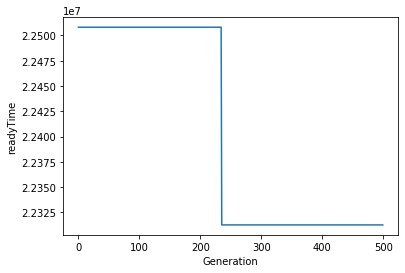

In [82]:
import matplotlib.pyplot
matplotlib.pyplot.plot(best_results)
matplotlib.pyplot.xlabel("Generation")
matplotlib.pyplot.ylabel("readyTime")
matplotlib.pyplot.show()